## Exercise Sheet 5

#### **Submission** <br> 07.07. 12:00 p.m. (via studIP)
#### **Defense** <br> 10.07. 08:00-10:00, 10.07 16:00-18:00 or 11.07. 10:00-12:00

A **maximum** of 3 percentage points bonus for the exam can be achieved with each sheet if:
1) at least 60% of the worksheet has been completed correctly 
2) the worksheet has been successfully defended (explained to the tutors).
*Conditions*:
- Each group must register for a slot in studIP for the defense. Only ONE person registers a slot. The whole group must appear for defense.
- Successful defense means that a team member selected by us explains the solution and answers questions about it.
- ChatGPT and other tools may be used, but must be cited.
- The code must be explained without any aids.
- We will not only evaluate the correctness of the results, but also whether the code is efficient, easy to understand, tidy and well documented.
- Each group submits only one solution as a zip file, which is provided with the name and student number of a group member. For example, `mustermann_12345678.zip`.
  - [zunaira zunaira] [10931968] 
  - [Muhammad Mustafa] [25850354]
  - [Neha Neha] [29235578]

## Exercise 1 (10%)

Load the Titanic Dataset as a Pandas DataFrame. Answer the following questions by editing the Pandas dataframe with appropriate functions and transformations:

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 1) (5%) What is the average ticket price per class? First create a barplot using `seaborn`, then determine the average value using the `.groupby()` method and add this value to the respective bar in the plot.

In [1]:
avg_fares = df.groupby('pclass')['fare'].mean().reset_index()
avg_fares.columns = ['Pclass', 'AverageFare']

NameError: name 'df' is not defined

In [2]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

barplot = sns.barplot(x='Pclass', y='AverageFare', data=avg_fares, palette='Blues_d')

# Add labels to each bar
for i, row in avg_fares.iterrows():
    barplot.text(x=i, y=row['AverageFare'] + 2,  # vertical offset
                 s=f"${row['AverageFare']:.2f}",
                 ha='center', va='bottom', fontsize=12)

plt.title("Average Ticket Price per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare ($)")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

#### 2) (5%) What is the median ticket price per class? Do the same as in the previous task and explain the difference between average and median based on your results.
<br> *Note: `sns.barplot()` has an argument `estimator` that might be useful.*

In [6]:
med_price=df.groupby("pclass")["fare"].median().reset_index()
med_price

KeyError: 'pclass'

In [3]:
# Assume df contains 'Pclass' and 'Fare'
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Plot median fare per class
bar = sns.barplot(data=df, x='pclass', y='fare', estimator=np.median, ci=None, palette='Set2')

# Compute medians manually for labeling
medians = df.groupby('pclass')['fare'].median().values

# Add labels on bars
for i, median in enumerate(medians):
    bar.text(i, median + 2, f"${median:.2f}", ha='center', va='bottom', fontsize=12)

plt.title("Median Ticket Price per Class")
plt.xlabel("Passenger Class")
plt.ylabel("Median Fare ($)")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

---

## Exercise 2 (40%)

#### 1. (10%) Use the package `scipy` to define a Gaussian distribution with mean 10 and standard deviation 3 and draw n = [100, 1000, 10000] samples from this distribution. Plot these sampling distributions as histograms in a 3-part figure. Then plot the PDF of the distribution onto the histograms.

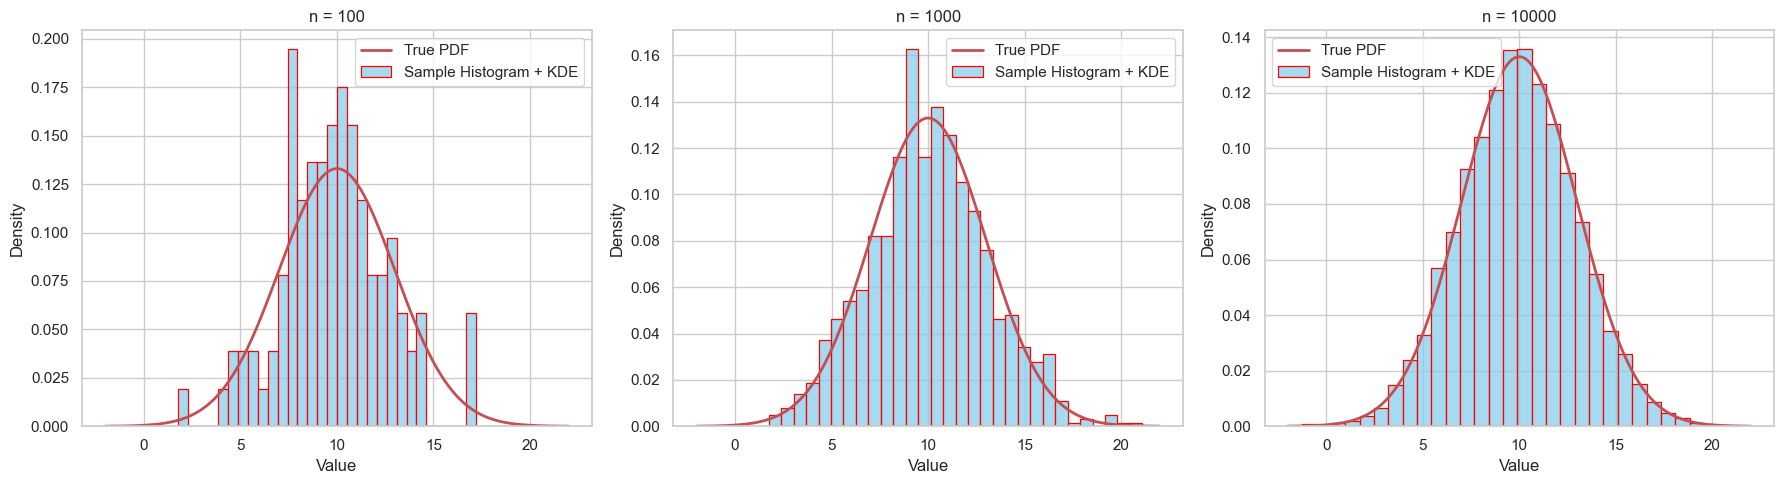

In [ ]:
# Parameters
mu = 10
sigma = 3
n_samples = [100, 1000, 10000]

# Create normal distribution
dist = norm(loc=mu, scale=sigma)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
pdf = dist.pdf(x)

# Set seaborn style
sns.set(style='whitegrid')

# Set up plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, n in enumerate(n_samples):
    samples = dist.rvs(size=n)
    ax = axes[i]

    # Histogram with KDE
    sns.histplot(samples, bins=30, stat='density', color='skyblue', edgecolor='red', ax=ax, label='Sample Histogram + KDE')
    
    # Plot true PDF
    ax.plot(x, pdf, 'r-', lw=2, label='True PDF')

    # Formatting
    ax.set_title(f'n = {n}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


#### 2. (5%) What is the difference between the standard deviation of the sampling distribution and the standard deviation of the underlying Gaussian distribution? Explain how this difference shows up in your empirical results.

In [ ]:
> STD of Gaussian Distribution:
This is ture standard deviation (spread) of population . It shows how much it (data) is deviate from the mean.

> STD of Sampling Distribution:
It is also called standard error. It is refer to STD of sample. 

> In our Histrogram:
it is simple visible as the number (n) is inresae Histrograms are getting smoother. It is simple called LAW of LARGE Number.
its mean as the number of sample increase it stendard error gets smaller   

#### 3. (10%) Load the numpy array `sample.npy`. Calculate the 95% confidence interval for the mean via bootstrapping and compare it with the empirical value.

95% Confidence Interval for Mean: [4.9514, 6.0795]


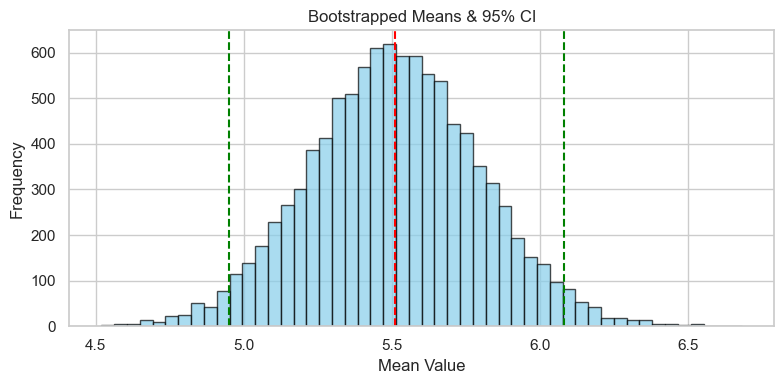

In [ ]:
data= np.load("sample.npy")

empirical_mean= np.mean(data)

n_bootstrap= 10000
bootstrap_means= []

np.random.seed(42) 
for _ in range(n_bootstrap):
    resample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(resample))

# Step 4: Compute 95% confidence interval
lower = np.percentile(bootstrap_means, 2.5)
upper = np.percentile(bootstrap_means, 97.5)
print(f"95% Confidence Interval for Mean: [{lower:.4f}, {upper:.4f}]")

# Optional: Plot histogram of bootstrapped means
plt.figure(figsize=(8, 4))
plt.hist(bootstrap_means, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(empirical_mean, color='red', linestyle='--', label='Empirical Mean')
plt.axvline(lower, color='green', linestyle='--', label='2.5th Percentile')
plt.axvline(upper, color='green', linestyle='--', label='97.5th Percentile')
plt.title('Bootstrapped Means & 95% CI')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### 4. (15%) The null hypothesis is now that the mean is equal to 5. The alternative hypothesis is that it is not equal to 5. Would you reject the null hypothesis? Use bootstrapping.

In [ ]:

# Step 2: Bootstrapping
n_bootstrap = 1000
bootstrap_means = []

np.random.seed(42)
for _ in range(n_bootstrap):
    resample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(resample))

bootstrap_means = np.array(bootstrap_means)

# Step 3: Compute two-tailed p-value for H₀: mean = 5
null_mean = 5
# Compute how extreme the observed mean is from 5
diff = np.abs(empirical_mean - null_mean)
# Count how many bootstrap means are more extreme than this distance from 5
p_value = np.mean(np.abs(bootstrap_means - null_mean) >= diff)

print(f"Empirical Mean: {empirical_mean:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean is significantly different from 5.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 5.")


Empirical Mean: 5.5087
P-value: 0.4760
Fail to reject the null hypothesis: No significant difference from 5.


## Exercise 3 (50%)

#### We want to know whether the groups in this tutorial need the same amount of time to solve the homework. To do this, we measured the times of 2 of the groups over the semester: 
<!--  -->
group1 = [6.2, 7.1, 1.5, 2.3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]\
group2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]
Use a significance level of 0.05 in this task. You can do all hypothesis testing with the help of `scipy`.

#### 1. (5%) What is H0 and H1? Are the groups independent or dependent (paired vs. unpaired)

In [ ]:
group1 = [6.2, 7.1, 1.5, 2.3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
group2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]
# Assume that both groups are independent
# 2 sample independent t-test 
t_test, p_values= stats.ttest_ind(group1, group2, equal_var=False)

print("T-statistic :",t_test)
print("P-value  :",p_values)
if  p_values> 0.05:
    print("Reject Ho: There is signficent difference between the mean of both groups")
else:
    print("Fail to reject Ho: There is no significent difference between the mean of both groups ")


T-statistic : 0.5584998115053302
P-value  : 0.580643642055525
Reject Ho: There is signficent difference between the mean of both groups


#### 2. Test the data for the following assumptions. You can also use your own suitable hypothesis tests for this purpose.

##### a) (15%) The data sets of both groups follow a normal distribution

In [ ]:
from scipy.stats import shapiro

stat1, p1= shapiro(group1)
stat2, p2=shapiro(group2)

if p1> 0.05:
    print ("The group 1 has normal distribution ")
else:
    print("There is no evidence group 1 has normal distribution")


if p2> 0.05:
    print ("The group 2 has normal distribution ")
else:
    print("There is no evidence group 2 has normal distribution")

There is no evidence group 1 has normal distribution
There is no evidence group 2 has normal distribution


##### b) (15%) The data sets of both groups have the same standard deviation (iid. data)

In [ ]:
from scipy.stats import levene

stat, p= levene(group1, group2)

print("The p-values of Levene test :", p)

if p> 0.05 :
    print("Reject the H0: There is significent difference between the standard deviation of both groups ")
else:
    print("Fail to reject the H0: There is no significent difference between the standard deviation of both groups ")

The p-values of Levene test : 0.47274412143222644
Reject the H0: There is significent difference between the standard deviation of both groups 


#### 3. (15%) Based on the results from 1. and 2., what type of hypothesis test do you need for this task? Run the test.

In [ ]:
from scipy.stats import mannwhitneyu

group1 = [6.2, 7.1, 1.5, 2.3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
group2 = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

# Run Mann–Whitney U test
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

# Results
print(f"Mann–Whitney U test p-value: {p:.4f}")
if p < 0.05:
    print("Reject H₀: The groups likely differ significantly.")
else:
    print("Fail to reject H₀: No significant difference between the groups.")


Mann–Whitney U test p-value: 0.6915
Fail to reject H₀: No significant difference between the groups.


---